In [1]:
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=d4fb83bd0892b5cb96a5c46eb6ec52ee4d91fddcf9397e7b54dac422fdf42928
  Stored in directory: /home/zeus/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


In [2]:
!kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray
License(s): Attribution 4.0 International (CC BY 4.0)
 99%|██████████████████████████████████████▋| 1.13G/1.14G [00:08<00:00, 113MB/s]
100%|███████████████████████████████████████| 1.14G/1.14G [00:08<00:00, 136MB/s]


In [3]:
!unzip pediatric-pneumonia-chest-xray.zip -d /teamspace/studios/this_studio/pneumonia-classifier/data

Archive:  pediatric-pneumonia-chest-xray.zip
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0001-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0003-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0005-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0006-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0007-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0009-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0010-0001.jpeg  
  inflating: /tea


  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0013-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0015-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0016-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0017-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0019-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0021-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classifier/data/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0022-0001.jpeg  
  inflating: /teamspace/studios/this_studio/pneumonia-classif

In [1]:
from pneumonia_cls.dataset import PediatricDataset, MyDataModule, MyDataset

2024-11-24 01:32:11.132 | INFO     | pneumonia_cls.config:<module>:11 - PROJ_ROOT path is: D:\yayi-make\pneumonia\pneumonia-classifier
d:\yayi-make\pneumonia\pneumonia-classifier\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = PediatricDataset(data_dir=r"..\data\PediatricChestX-rayPneumonia", split='train',resample=False, transform=None)
data.df.labels.value_counts()/len(data.df)

labels
1    0.742217
0    0.257783
Name: count, dtype: float64

In [2]:
# data = PediatricDataset(data_dir=r"..\data\PediatricChestX-rayPneumonia", split='validation',resample=False, transform=None)
# data.df.labels.value_counts()/len(data.df)

In [3]:
# data = PediatricDataset(data_dir=r"..\data\PediatricChestX-rayPneumonia", split='test', transform=None)
# data.df.labels.value_counts()/len(data.df)

In [ ]:
datamodule = MyDataModule(batchsize=32,
                          resample_val=True,
                          resample_train=False,
                          use_pediatricdataset=True,
                          pediatricdata_path=r"..\data\PediatricChestX-rayPneumonia")

datamodule.setup('fit')

train data: 3662 samples.
val data: 810 samples.


In [8]:
train_loader = datamodule.train_dataloader()

for img,label in train_loader:

    pass

In [9]:
val_loader = datamodule.val_dataloader()

for img,label in val_loader:

    pass

In [21]:
import os,io
import pandas as pd
from PIL import Image

# Chemin vers le dossier contenant les images
test_dir = '/teamspace/studios/this_studio/Pediatric Chest X-ray Pneumonia/test'

# Initialiser une liste pour les données
data = []


# Parcourir les sous-dossiers (Pneumonie, Normale)
for label in ['PNEUMONIA', 'NORMAL']:
    label_value = 1 if label == 'PNEUMONIA' else 0  # Attribution du label binaire
    print(f"Traitement du label: {label} avec valeur {label_value}")  # Debugging
    
    # Obtenir le chemin des images dans chaque sous-dossier
    folder_path = os.path.join(test_dir, label)
    
    # Vérifier si le sous-dossier existe
    if not os.path.exists(folder_path):
        print(f"Le dossier {folder_path} n'existe pas. Vérifie le chemin.")
        continue

    for image_filename in os.listdir(folder_path):
        # Créer le chemin complet de l'image
        image_path = os.path.join(folder_path, image_filename)
        
        # Ouvrir l'image et la convertir en bytes
        with Image.open(image_path) as img:
            img_byte_arr = io.BytesIO()
            img.save(img_byte_arr, format='JPEG')  # Tu peux changer le format si nécessaire
            img_byte_arr = img_byte_arr.getvalue()  # Convertir l'image en bytes
        
        # Créer un dictionnaire avec les bytes de l'image
        image_dict = {'bytes': img_byte_arr}
        
        # Ajouter les données dans la liste
        data.append([image_path, image_dict, label_value])

# Convertir la liste en DataFrame
df = pd.DataFrame(data, columns=['image_file_path', 'image', 'labels'])

# Afficher un aperçu du DataFrame
print(df.head())

# Vérifier les labels uniques
print("Labels uniques : ", df['labels'].unique())

Traitement du label: PNEUMONIA avec valeur 1


Traitement du label: NORMAL avec valeur 0
                                     image_file_path  \
0  /teamspace/studios/this_studio/Pediatric Chest...   
1  /teamspace/studios/this_studio/Pediatric Chest...   
2  /teamspace/studios/this_studio/Pediatric Chest...   
3  /teamspace/studios/this_studio/Pediatric Chest...   
4  /teamspace/studios/this_studio/Pediatric Chest...   

                                               image  labels  
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       1  
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       1  
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       1  
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       1  
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       1  
Labels uniques :  [1 0]


In [9]:
import pandas as pd
import json

In [3]:
df = pd.read_csv("/teamspace/studios/this_studio/pneumo_test.csv")

In [12]:
import ast

def safe_eval(text):
    try:
        return ast.literal_eval(text)
    except Exception:
        return None  # Ou une valeur par défaut si la conversion échoue

df["image"] = df["image"].apply(safe_eval)


In [13]:
print(df["image"].head(10))  # Affiche les 10 premières lignes


0    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
5    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
6    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
7    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
8    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
9    {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
Name: image, dtype: object


In [14]:
print(type(df["image"].iloc[0]))

<class 'dict'>


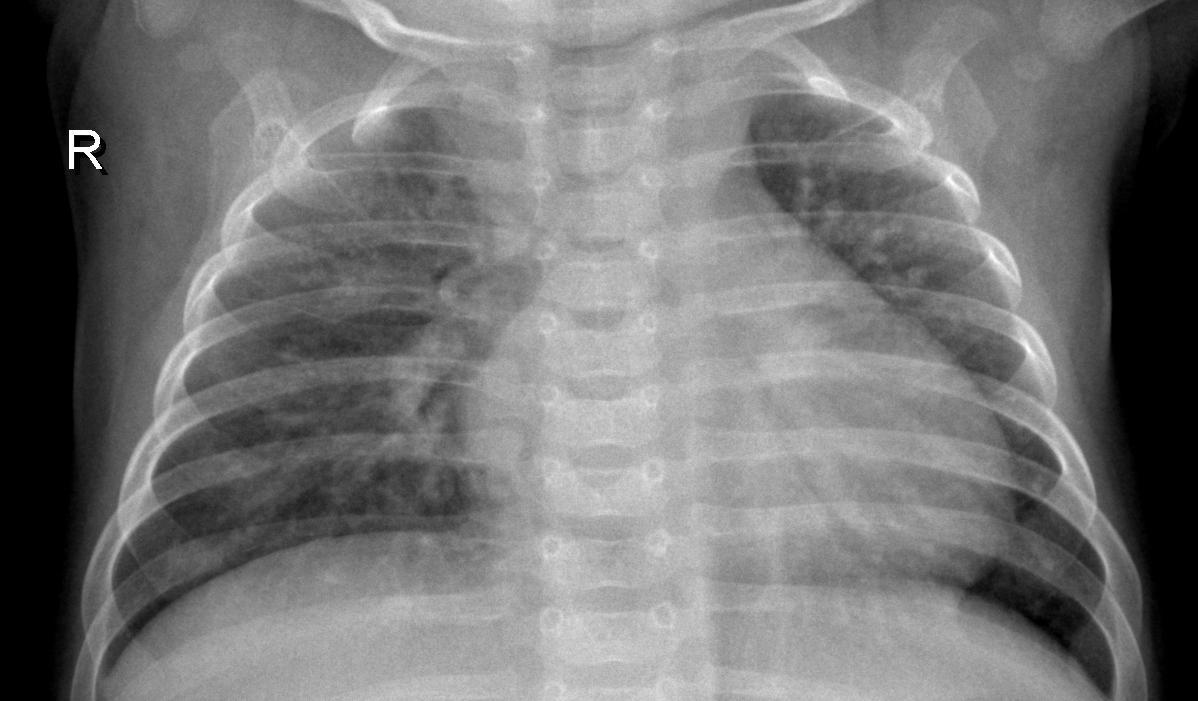

In [25]:
im = df["image"][0]["bytes"]
Image.open(io.BytesIO(im))

In [3]:
from datasets import load_dataset

d:\yayi-make\pneumonia\pneumonia-classifier\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
for split in ['validation','train','test']:
    print(split,end='\n')
    _ = load_dataset("trpakov/chest-xray-classification", "full", split=split,cache_dir='../data') #.to_pandas()

validation
train
test


In [28]:
df

,image_file_path,image,labels
0,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
1,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
2,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
3,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
...,...,...,...
619,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
620,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
621,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
622,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [26]:
df_concat = pd.concat([df, test_data], ignore_index=True)

In [27]:

df_concat

,image_file_path,image,labels
0,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
1,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
2,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
3,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4,/teamspace/studios/this_studio/Pediatric Chest...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
...,...,...,...
1201,/storage/hf-datasets-cache/all/datasets/216605...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1202,/storage/hf-datasets-cache/all/datasets/216605...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1203,/storage/hf-datasets-cache/all/datasets/216605...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1204,/storage/hf-datasets-cache/all/datasets/216605...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [31]:
dataset =load_dataset("trpakov/chest-xray-classification", "full")

In [34]:
import fiftyone as fo
import os
from PIL import Image
from io import BytesIO

# Create a FiftyOne dataset
fiftyone_dataset = fo.Dataset("huggingface_data")

# Define a directory to save images if they are stored as bytes
image_dir = "huggingface_images"
os.makedirs(image_dir, exist_ok=True)

# Iterate over the Hugging Face dataset
for idx, sample in enumerate(dataset["train"]):
    # Handle image data (file paths or bytes)
    if "image_file_path" in sample:  # If images are file paths
        filepath = sample["image_file_path"]
    elif "image" in sample:  # If images are in bytes
        img = Image.open(BytesIO(sample["image"]["bytes"]))
        filepath = os.path.join(image_dir, f"image_{idx}.jpg")
        img.save(filepath)
    else:
        raise ValueError("No image data found in the dataset")

    # Add the sample to the FiftyOne dataset
    fiftyone_sample = fo.Sample(
        filepath=filepath,
        ground_truth=fo.Classification(label=str(sample["labels"]))  # Replace 'label' with the correct column name
    )
    fiftyone_dataset.add_sample(fiftyone_sample)

print("Dataset loaded into FiftyOne")


Dataset loaded into FiftyOne


In [35]:
session = fo.launch_app()
session.dataset = fiftyone_dataset


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.0.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|

